<a href="https://colab.research.google.com/github/GiaHan2702/lab1_intro_python/blob/main/ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4) Write a script file to blur the face region of the given image.


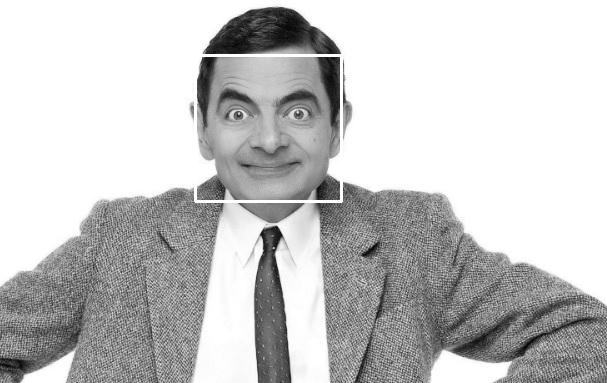

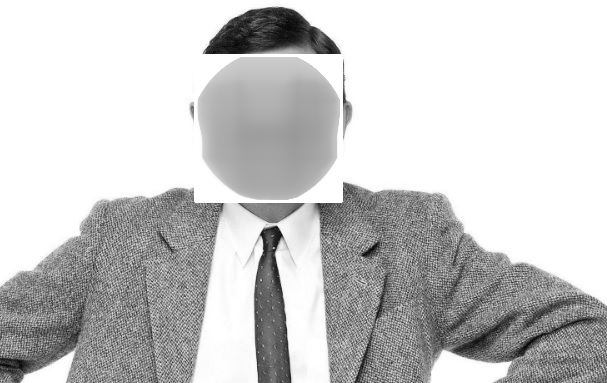

In [13]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import random

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
# Read the input image
#img = cv2.imread('test.jpg')
# Convert into grayscale
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mrbean2.jpg',cv2.IMREAD_GRAYSCALE) 

#create kernel
kernel= np.ones((5,5),np.float32)/25.0

#select ROI (top_y, top_x,height,width)


face_rects = face_cascade.detectMultiScale(img, 1.3, 5, minSize=(30, 30))

# Draw rectangle around the faces
for (x, y, w, h) in face_rects:
    roi= cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2_imshow(roi)

#compute mean for each pixel
roi=cv2.filter2D(roi,cv2.CV_8U,kernel)

# go through the face bounding boxes 
for (x, y, w, h) in face_rects:
    # get the region of the face
    face_roi = img[y:y + h, x:x + w]
    
    # apply blurring to the part of the face
    blurred = cv2.medianBlur(face_roi, 85)  
    # replace the part of the face with the blurred image  
    img[y:y+h, x:x+w] = blurred    


# Display the output
cv2.waitKey()
cv2_imshow(img)

